## Visualizing each match based on spawn and death location
In this data set there are 9 Call of Duty World events, each in a different city and within these events there is a `json` file for each match. I will be visualizing each match with a plot of spawns and deaths overlaid on the map the match was played on.

In [1]:
import os
import ujson
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure

Creating a dictionary of each map image so that we can easily reference them.

In [2]:
maps = {
    'Aachen': 'aachen.png',
    'Ardennes Forest': 'ardennes_forest.png',
    'Flak Tower': 'flaktower.png',
    'Gibraltar': 'gibraltar.png',
    'London Docks': 'london_docks.png',
    'Sainte Marie du Mont': 'sainte_marie_du_mont.png' ,
    'USS Texas': 'uss_texas.png',
    'Valkyrie': 'valkyrie.png'
}

### Creating directories to save visualizations and to gather json data.
* `rootdir` is where the event folders are, each containing match data in the form of jsons.
* `map_loc` is where the .png files of the maps are located.
* `plot_save_point` is the larger folder where visualizations will be stored. This folder will contain a folder for each event which will in turn contain the visualizations for that event.

In [3]:
rootdir = os.path.join('./', 'cod_folders')
map_loc = os.path.join('./', 'ww2')
plot_save_point = os.path.join('./', 'visualizations')

try:
    os.mkdir(map_loc)
except:
    print('map_loc already established.')
    
try:
    os.mkdir(plot_save_point)
except:
    print('plot_save_point already established.')

map_loc already established.


In [4]:
for subdir, dirs, files in os.walk(rootdir):
    folder = subdir.replace('cod_folders', '')
    if folder != '':
        try:
            os.mkdir(os.path.join('./', 'visualizations', folder))
            print(plot_save_point + folder)
        except:
            print('Folder: ' + plot_save_point + folder + ' already created.')

Folder: ./visualizations./ already created.
./visualizations.//structured-2018-04-01-birmingham
./visualizations.//structured-2018-01-14-neworleans
./visualizations.//structured-2018-04-19-relegation
./visualizations.//structured-2018-04-08-proleague1
./visualizations.//structured-2018-08-19-champs
./visualizations.//structured-2018-07-29-proleague2
./visualizations.//structured-2018-06-17-anaheim
./visualizations.//structured-2018-03-11-atlanta
./visualizations.//structured-2018-04-22-seattle


### Function that makes the plot and saves it

In [7]:
def map_maker(match, subdir):
    mmap = match['map']
    team1 = match['teams'][0]['name']
    team2 = match['teams'][1]['name']

    kill_pos, death_pos, spawn_pos = {'x': [], 'y': []}, {'x': [], 'y': []}, {'x': [], 'y': []}

    for event in range(len(match['events'])):
        if match['events'][event]['type'] == 'spawn':
            spawn_pos['x'].append(match['events'][event]['data']['pos']['x'])
            spawn_pos['y'].append(match['events'][event]['data']['pos']['y'])

        if match['events'][event]['type'] == 'death':
            kill_pos['x'].append(match['events'][event]['data']['attacker']['pos']['x'])
            kill_pos['y'].append(match['events'][event]['data']['attacker']['pos']['y'])

            death_pos['x'].append(match['events'][event]['data']['pos']['x'])
            death_pos['y'].append(match['events'][event]['data']['pos']['y'])
    map_file_loc = os.path.join('./', 'ww2', maps[mmap])
    map_png = plt.imread(map_file_loc)

    # creating the figure
    # This code should stop a memory leak common with matplotlib
    fig = Figure()
    FigureCanvas(fig)
    
    ax = fig.add_subplot(1,1)
    fig.set_figheight(15)
    fig.set_figwidth(15)
    # plot the map
    ax.imshow(map_png)
    ax.set_facecolor((210/255.0, 210/255.0, 210/255.0))
    # plot the spawns
    ax.scatter(spawn_pos['x'], spawn_pos['y'], color='white', label = 'Spawn')
    # plot the deaths
    ax.scatter(kill_pos['x'], kill_pos['y'], color='cyan', label = 'Kill')
    ax.scatter(death_pos['x'], death_pos['y'], color='red', label = 'Death')
    # plot the kill-to-death lines
    for i in range(len(kill_pos['x'])):
        ax.plot([kill_pos['x'][i], death_pos['x'][i]], [kill_pos['y'][i], death_pos['y'][i]], color='white')

    # set title
    title = mmap + ' (' + match['mode'] +'): ' + team1 + ' vs. ' + team2
    ax.set_title(title)
    ax.legend()
    save_file = '/' + mmap + '_' + match['mode'] + '_' + team1 + '_' + team2 + match['id'][0:25] +'_' + '.png'

    folder = 'structured' + subdir.split('structured', 1)[1]
    new_loc = os.path.join('./', 'visualizations', folder)
    if new_loc != '':

        fig.savefig(new_loc + save_file)
    plt.close()

### Creating plotted maps
Here we'll create maps using the match data and save them in a folder named `visualizations`.

In [ ]:
# Iterating through each folder
for subdir, dirs, files in os.walk(rootdir): 
    # Iterating through each json file in the folder
    for file in files:
        jsonpath = os.path.join(subdir, file)
        with open(jsonpath, 'r') as f:
            match = ujson.loads(f.read())
            f.close()
            mmap = match['map']
            if '?' not in mmap:
                # Calling the map maker function
                map_maker(match, subdir)

### Accessing a map
Creating a map using the last map created. We can see the spawn points, the kill spots, and the death spots.

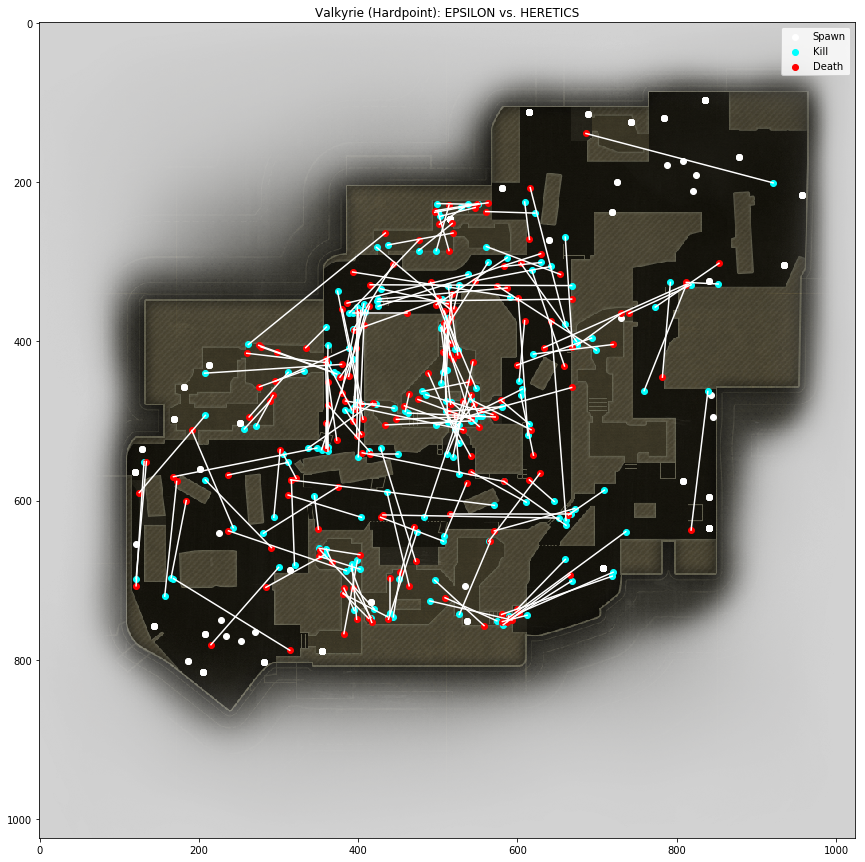

In [11]:
# creating the figure
ax = fig.add_subplot(1,1)
fig.set_figheight(15)
fig.set_figwidth(15)
# plot the map
ax.imshow(map_png)
ax.set_facecolor((210/255.0, 210/255.0, 210/255.0))
# plot the spawns
ax.scatter(spawn_pos['x'], spawn_pos['y'], color='white', label = 'Spawn')
# plot the deaths
ax.scatter(kill_pos['x'], kill_pos['y'], color='cyan', label = 'Kill')
ax.scatter(death_pos['x'], death_pos['y'], color='red', label = 'Death')
# plot the kill-to-death lines
for i in range(len(kill_pos['x'])):
    ax.plot([kill_pos['x'][i], death_pos['x'][i]], [kill_pos['y'][i], death_pos['y'][i]], color='white')

# set title
title = mmap + ' (' + match['mode'] +'): ' + team1 + ' vs. ' + team2
ax.set_title(title)
ax.legend()